In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [16]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)

In [21]:
df.shape

(18280, 48)

In [22]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [23]:
mean_price = np.mean( df['prices_amountmin'])
mean_price

93.53952188183217

In [25]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

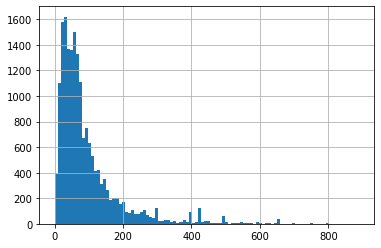

In [26]:
df['prices_amountmin'].hist(bins=100)

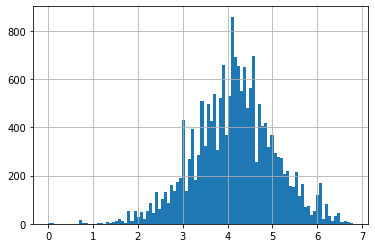

In [29]:
np.log1p(df['prices_amountmin']).hist(bins=100)

In [30]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [32]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [34]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [38]:
df.brand.value_counts()

Nike                1709
PUMA                 574
Ralph Lauren         524
New Balance          361
VANS                 356
                    ... 
Game Time              1
RLX Ralph Lauren       1
Radii                  1
Gelato Mens            1
Swiss Cross            1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [44]:
feats=['brand_cat']
X =df[feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X =df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [48]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [50]:
df.manufacturer.value_counts()

Puma                       476
Nike                       374
New Balance                249
VANS                       170
Reebok                     128
                          ... 
Forever                      1
Romeo and Juliette Inc.      1
2(x)ist                      1
VIONIC BY ORTHAHEEL          1
Minav Corp.                  1
Name: manufacturer, Length: 618, dtype: int64

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [58]:
run_model(['brand_cat', 'manufacturer_cat']) 

(-58.539304199085976, 4.311223231615437)

In [67]:
df.sample()

,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,ean,features,flavors,imageurls,isbn,keys,manufacturer,manufacturernumber,merchants,name,prices_amountmin,prices_amountmax,prices_availability,prices_color,prices_condition,prices_count,prices_currency,prices_dateadded,prices_dateseen,prices_flavor,prices_issale,prices_merchant,prices_offer,prices_returnpolicy,prices_shipping,prices_size,prices_source,prices_sourceurls,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight,brand_cat,manufacturer_cat,colors_cat,prices_currency_cat
17460,AVpfqN3kLJeJML43BV7d,NaN,Converse,"All Men's Shoes,Shoes,Men's Shoes,Clothing",RedBlackWhite,NaN,2017-01-27T01:24:01Z,2017-01-27T01:24:01Z,"[{""dateSeen"":[""2017-01-27T01:24:01Z""],""sourceU...",NaN,8.887532e+11,"[{""key"":""Manufacturer Part Number"",""value"":[""1...",NaN,https://i5.walmartimages.com/asr/c45c7560-b345...,NaN,"0888753219418,converse/151090c7,888753219418",Converse,151090C-7,"[{""dateSeen"":[""2017-01-27T01:24:01Z""],""name"":""...",Converse Chuck Taylor All Star Ii Low Top Red ...,64.95,64.95,NaN,NaN,new,NaN,USD,2017-01-27T01:24:01Z,2017-01-24T00:00:00Z,NaN,False,Magic Sneaker City - Walmart.com,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Converse-Chuck-Tayl...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Converse-Chuck-Tayl...,8.887532e+11,NaN,NaN,NaN,64,25,1074,0


In [62]:
df['colors'].value_counts()

Black                                                                                                                           1364
Brown                                                                                                                            746
Blue                                                                                                                             421
Multicolor                                                                                                                       415
White                                                                                                                            252
                                                                                                                                ... 
Safety Green,Red,Black,Gold,Purple,Navy Blue,Royal Blue,Maroon,Oxford,Orange,Chocolate,Forest Green,Irish Green                    1
Blazing Orange                                                       

In [0]:
df['colors_cat'] = df['colors'].factorize()[0]

In [64]:
run_model(['brand_cat', 'manufacturer_cat', 'colors_cat']) 

(-61.76723637561052, 5.743222840525944)

In [0]:
df['prices_currency_cat'] = df['prices_currency'].factorize()[0]

In [66]:
run_model(['brand_cat', 'manufacturer_cat', 'prices_currency_cat']) 

(-58.539304199085976, 4.311223231615435)